<a href="https://colab.research.google.com/github/janjuatest/Titanic-Dataset/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the data manipulation/visualization libraries needed


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the titanic dataset
Please name the file as below i.e. titanic_train.csv

In [3]:
df=pd.read_csv('titanic_train.csv')

Check the dataframe information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check data frame for missing elements N/A values

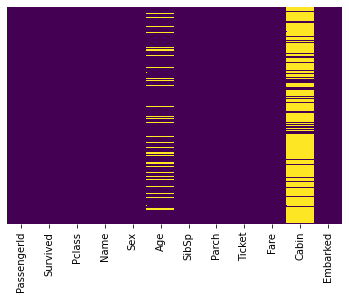

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

As can be seen above Cabin column has a lot of missing data. We can count the exact elements missing as follows

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can drop the Cabin columns since its mostly empty

In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Lets look at the target column i.e. 'Survived'. This is what we are trying to predict

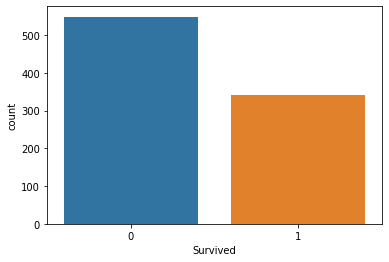

In [ ]:
sns.countplot(data=df,x='Survived')

Data is unbalanced but usable

Lets do some more EDA

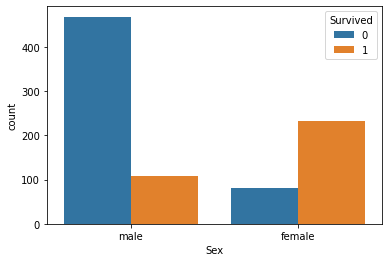

In [ ]:
sns.countplot(x='Sex',data=df,hue='Survived')

As can be seen above there is clearly a higher survival rate for female passengers


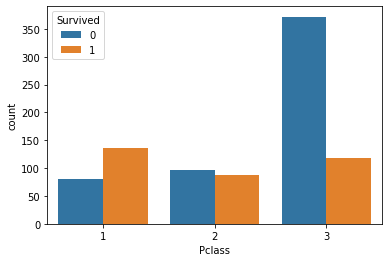

In [ ]:
sns.countplot(x='Pclass',data=df,hue='Survived')

As can be seen above there is a lower survival rate for passengers from Class 3. These are important columns for machine learning algorithm

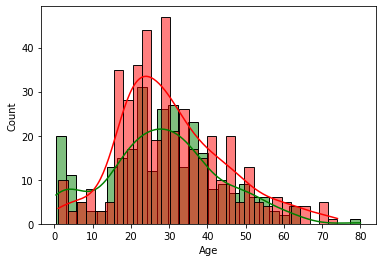

In [ ]:
sns.histplot(df[df['Survived']==1]['Age'],bins=30,color='green',kde=True)
sns.histplot(df[df['Survived']==0]['Age'],bins=30,color='red',kde=True)

As can be seen above, age also has an impact. Notice the double bump for infants in passengers survived

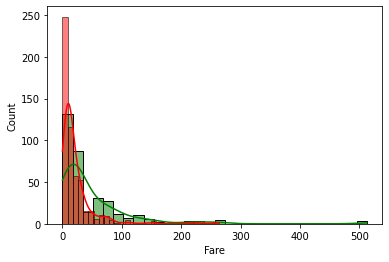

In [ ]:
sns.histplot(df[df['Survived']==1]['Fare'],bins=30,color='green',kde=True)
sns.histplot(df[df['Survived']==0]['Fare'],bins=30,color='red',kde=True)

Not much effect of Fares on Survival

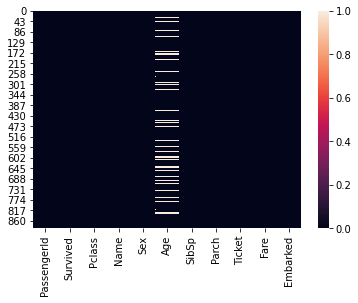

In [10]:
sns.heatmap(df.isnull())

Age column has some missing data

In [11]:
print(df[df['Pclass']==1]['Age'].mean())
print(df[df['Pclass']==2]['Age'].mean())
print(df[df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


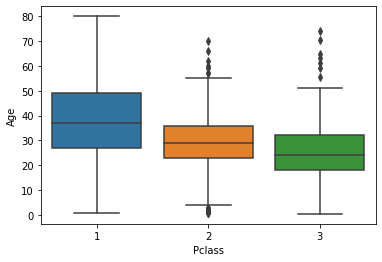

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=df)

Age and Passenger Class has some correlation

Lets fill the Nulls in Age column with average values for each passenger class

In [12]:
cd=df[['Age','Pclass']]

In [13]:
cd

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


Function to replace NaN values in Age column with average age of Passenger Class

In [14]:
def fillage(pair):
    Age=pair[0]
    Class=pair[1]
    
    if pd.isnull(Age):
        if Class==1:
            return 38
        elif Class==2:
            return 30
        else:
            return 25
    else:
        return Age

Replace Nan with mean age

In [15]:
df['Age']=df[['Age','Pclass']].apply(fillage,axis=1)

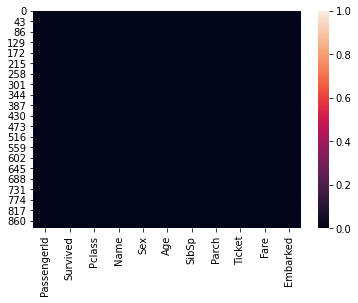

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All nulls have been replaced or dropped now

Now lets look at the the columns

Lets convert sex column into boolean

In [19]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Sex_male'],
      dtype='object')

Sex column has now been converted into a Boolean

In [21]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Lets now look at the Embarked column. It has three different values. Lets also convert them into boolean columns

In [22]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
349247      1
350046      1
244373      1
113794      1
3101298     1
Name: Ticket, Length: 680, dtype: int64

The Ticket and Name columns dont have any important categories so can be dropped

In [24]:
df.drop(['Ticket','Name'],axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
df.drop('PassengerId',axis=1,inplace=True)

Passenger Id is also just an index so should be dropped

In [26]:
len (df)

889

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [28]:
df['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

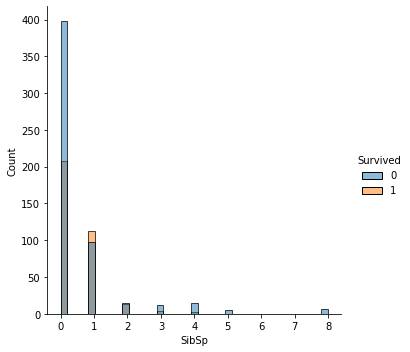

In [32]:
sns.displot(data=df,x='SibSp',hue='Survived')

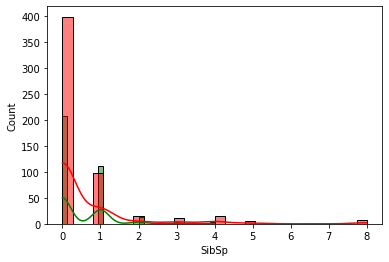

In [33]:
sns.histplot(df[df['Survived']==1]['SibSp'],bins=30,color='green',kde=True)
sns.histplot(df[df['Survived']==0]['SibSp'],bins=30,color='red',kde=True)

There appears to be some relationship between number of siblings and survival, so we keep this column




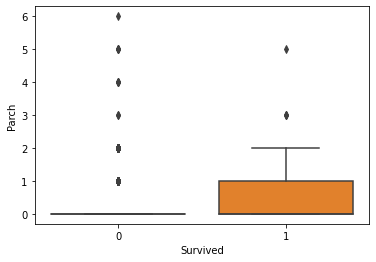

In [37]:
sns.boxplot(data=df,y='Parch',x='Survived')

There also appears to be some relationship between number of parents and children and survival, so we keep this column also

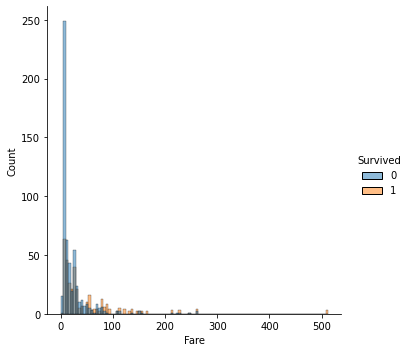

In [45]:
sns.displot(data=df,x='Fare',hue='Survived')

The survival rate appears to be higher for higher fares so this cloumn is also useful

All columns to be retained have now been analyzed

In [38]:
len(df)

889

We started with a total of 891 data points so this is good retention

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
y=df['Survived']


y is the Target/Output column

In [41]:
X=df.drop('Survived',axis=1)

X is now the input with all relevant data columns except the output column

In [42]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [46]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

Lets now try Logistic Regression from Sci Kit Learn Machine Learning Algorithms

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Seperate data into a training set and a test set
Test set has 25% of data

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel=LogisticRegression()

In [51]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Instantiate Model and then Fit it usind the train data



In [52]:
predictions=logmodel.predict(X_test)

Import the metrics for measuring the results

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



NOT BAD! We have reached 83% accuracy with Logistic Regression

In [55]:
confusion_matrix(y_test,predictions)

array([[126,  10],
       [ 27,  60]])

WE have 10 Type 1 (False Positive) and 27 Type 2 errors(False negative)

Now lets try Support Vector Machines for Binary Classification

In [56]:
from sklearn.svm import SVC

In [57]:
mySVCmodel=SVC(gamma='auto',C=1000)

In [58]:
mySVCmodel.fit(X_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
predictionsSVC=mySVCmodel.predict(X_test)

In [62]:
print(classification_report(y_test,predictionsSVC))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       136
           1       0.53      0.47      0.50        87

    accuracy                           0.63       223
   macro avg       0.61      0.60      0.60       223
weighted avg       0.63      0.63      0.63       223



SVC doesnt perform very well and we need to optimize the C and gamma parameters

In [ ]:
print(confusion_matrix(y_test,predictionsSVC))

[[101  35]
 [ 32  55]]


In [63]:
from sklearn.model_selection import GridSearchCV

GridSearchCV is the best model to optimize the hyper parameters

In [64]:
paramgrid={'C':[100,1000],'gamma':['auto',0.001],'kernel':['linear','rbf']}

Make a grid of parameters to find the best one

In [66]:
gridSVC=GridSearchCV(mySVCmodel,paramgrid,verbose=2,cv=5)

Use SK Learn's Grid Search CV. An awesome tool to optimize the hyperparameters of the model like C, gamma and kernel in SVC above


In [67]:
gridSVC.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=100, gamma=auto, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=100, gamma=auto, kernel=linear, total= 1.9min
[CV] C=100, gamma=auto, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] ................. C=100, gamma=auto, kernel=linear, total=  57.9s
[CV] C=100, gamma=auto, kernel=linear ................................
[CV] ................. C=100, gamma=auto, kernel=linear, total=  45.3s
[CV] C=100, gamma=auto, kernel=linear ................................
[CV] ................. C=100, gamma=auto, kernel=linear, total=  37.2s
[CV] C=100, gamma=auto, kernel=linear ................................
[CV] ................. C=100, gamma=auto, kernel=linear, total=  35.7s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV] .................... C=100, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV] .................... C=100, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV] .................... C=100, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 26.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1000, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000], 'gamma': ['auto', 0.001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

GridSearchCV using Cross validation to find the best hyper parameters
This may take sometime


In [68]:
gridSVC.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}

In [69]:
predictionsGrid=gridSVC.predict(X_test)

Predictions made using the best hyper parameters

In [70]:
print(classification_report(y_test,predictionsGrid))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       136
           1       0.81      0.66      0.73        87

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



So we can get upto 80% accuracy using SVC
In this case SVC was worse than Logistic Regression 



Now lets try deep learning by Tensorflow

In [82]:
from sklearn.preprocessing import MinMaxScaler
myScaler=MinMaxScaler()
X_trainS=myScaler.fit_transform(X_train.values)
X_testS=myScaler.transform(X_test.values)
y_trainS=y_train
y_testS=y_test


First we need to scale the input and output data as above

In [84]:
X_val=X_testS[-100:]
y_val=y_testS[-100:]

Then we need to create a validation set

In [83]:
X_trainS

array([[1.        , 0.31815083, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.38633574, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.34542479, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.60452748, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.33178781, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.56361653, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [108]:
X_trainS.shape

(666, 8)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [128]:
myTFmodel=Sequential([
    Dense(8,activation='relu',input_shape=(666,8)),
    Dense(4,activation='relu'),
    Dense(1,activation='sigmoid')
])


Define the Deep neural net with 3 layers
Drop out layers may be added to prevent overfitting

In [129]:
myTFmodel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

Compile the DNN model for binary classes and minimize root mean square error

In [130]:
myTFmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 666, 8)            72        
_________________________________________________________________
dense_18 (Dense)             (None, 666, 4)            36        
_________________________________________________________________
dense_19 (Dense)             (None, 666, 1)            5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [131]:
history=myTFmodel.fit(X_trainS,y_trainS,epochs=500,verbose=2,validation_data=(X_val,y_val))

Epoch 1/500
21/21 - 1s - loss: 0.6843 - acc: 0.5390 - val_loss: 0.6703 - val_acc: 0.5800
Epoch 2/500
21/21 - 0s - loss: 0.6653 - acc: 0.6141 - val_loss: 0.6525 - val_acc: 0.6400
Epoch 3/500
21/21 - 0s - loss: 0.6525 - acc: 0.6216 - val_loss: 0.6413 - val_acc: 0.6500
Epoch 4/500
21/21 - 0s - loss: 0.6441 - acc: 0.6201 - val_loss: 0.6332 - val_acc: 0.6400
Epoch 5/500
21/21 - 0s - loss: 0.6375 - acc: 0.6201 - val_loss: 0.6259 - val_acc: 0.6400
Epoch 6/500
21/21 - 0s - loss: 0.6321 - acc: 0.6201 - val_loss: 0.6203 - val_acc: 0.6400
Epoch 7/500
21/21 - 0s - loss: 0.6272 - acc: 0.6201 - val_loss: 0.6151 - val_acc: 0.6400
Epoch 8/500
21/21 - 0s - loss: 0.6224 - acc: 0.6201 - val_loss: 0.6099 - val_acc: 0.6400
Epoch 9/500
21/21 - 0s - loss: 0.6176 - acc: 0.6201 - val_loss: 0.6052 - val_acc: 0.6400
Epoch 10/500
21/21 - 0s - loss: 0.6126 - acc: 0.6216 - val_loss: 0.6002 - val_acc: 0.6500
Epoch 11/500
21/21 - 0s - loss: 0.6074 - acc: 0.6261 - val_loss: 0.5952 - val_acc: 0.6500
Epoch 12/500
21/21 

Train the DNN

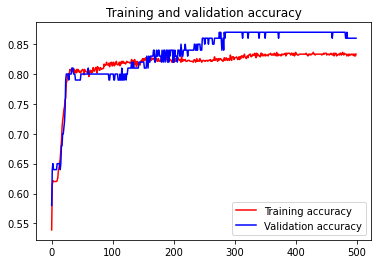

<Figure size 432x288 with 0 Axes>

In [132]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


Plots of training and validation accuracy above show thatwe dont have overfitting. Otherwise, validation error would be increasing

In [133]:
predictionsTF=myTFmodel.predict(X_testS)

In [134]:
predictionsTF.shape

(223, 1)

Get the predictions from the TF model

In [135]:
predictionsTF

array([[0.11881706],
       [0.07771772],
       [0.8957963 ],
       [0.9778533 ],
       [0.07696962],
       [0.05940095],
       [0.11212552],
       [0.15457326],
       [0.0951446 ],
       [0.89371026],
       [0.91748154],
       [0.9694123 ],
       [0.11883894],
       [0.519497  ],
       [0.1186119 ],
       [0.13249612],
       [0.9859619 ],
       [0.9706186 ],
       [0.3813691 ],
       [0.1137284 ],
       [0.11873037],
       [0.09593651],
       [0.34801427],
       [0.2951619 ],
       [0.05257139],
       [0.34765583],
       [0.426351  ],
       [0.53474313],
       [0.28576928],
       [0.19431305],
       [0.10804775],
       [0.16533667],
       [0.01815701],
       [0.11887372],
       [0.1215257 ],
       [0.22027737],
       [0.9820807 ],
       [0.08121708],
       [0.05887851],
       [0.10005915],
       [0.36530006],
       [0.1443673 ],
       [0.12967566],
       [0.90627086],
       [0.45768598],
       [0.09566846],
       [0.5559673 ],
       [0.915

The output is a continuos variable and needs to be converted into binary with cutoff of >0.5 for 1

In [136]:
binarypredictions=[]
value=0
for entry in predictionsTF:
  if entry >0.5:
    value=1
  else:
    value=0
  binarypredictions.append(value)

In [137]:
binarypredictions

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0]

In [138]:
print (classification_report(y_test,binarypredictions))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       136
           1       0.92      0.67      0.77        87

    accuracy                           0.85       223
   macro avg       0.87      0.81      0.83       223
weighted avg       0.86      0.85      0.84       223



We can get to 84% accuracy with the DNN





In [139]:
print (confusion_matrix(y_test,binarypredictions))

[[131   5]
 [ 29  58]]
